# 5. Clustering (군집)
- 군집 (Clustering)은 데이터 셋을 클러스터 (Cluster)라는 그룹으로 나누는 작업
- 한 클러스터 안의 데이터 포인트끼리는 매우 비슷하고 다른 클러스터의 데이터 포인트와는 구분되도록 데이터를 나누는 것이 목표
- 분류 알고리즘과 비슷하게 군집 알고리즘은 각 데이터 포인트가 어느 클러스터에 속하는지 할당 (또는 예측)

## 5-1. k-평균 군집
- k-평균 (k-means) 군집은 가장 간단하고 또 널리 사용하는 군집 알고리즘
- 이 알고리즘은 데이터의 어떤 영역을 대표하는 클러스터 중심 (Cluster Center)을 찾음
- 알고리즘은 두 단계를 반복. 먼저 데이터 포인트를 가장 가까운 클러스터 중심에 할당하고, 클러스터에 할당된 데이터 포인트의 평균으로 클러스터 중심을 다시 지정
- 클러스터에 할당되는 데이터 포인트에 변화가 없을 때 알고리즘이 종료됨

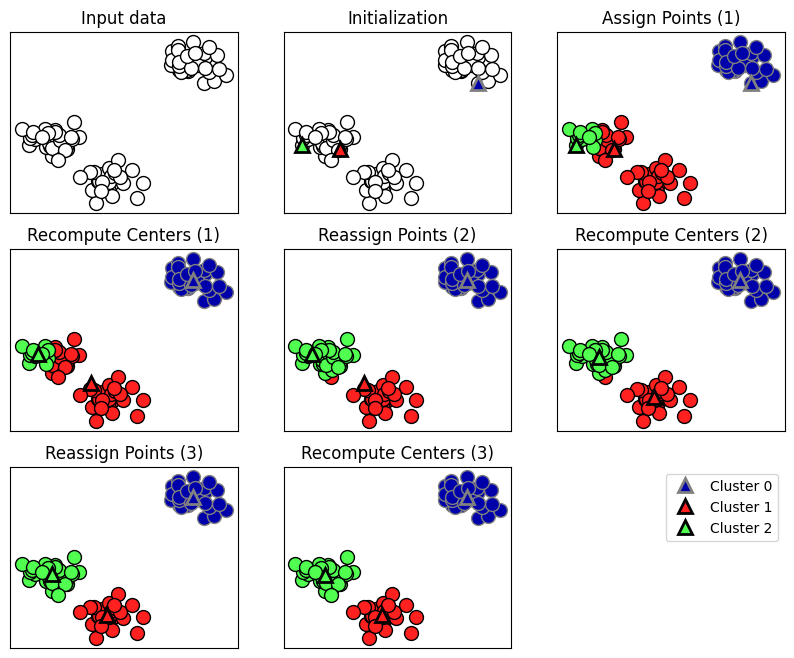

In [118]:
# 예시용 데이터셋에 k-평균 군집을 적용한 예
import mglearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import NMF
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline

mglearn.plots.plot_kmeans_algorithm()

- 삼각형은 클러스터 중심이고 원은 데이터 포인트. 클러스터는 색으로 구분
- 3개의 클러스터를 찾도록 지정했으니 알고리즘이 클러스터 중심으로 삼을 데이터 포인트 3개를 무작위로 초기화했음 (그림의 "초기화")
- 그 다음 알고리즘이 반복됨. 먼저 각 데이터 포인트를 가장 가까운 클러스터 중심에 할당 (그림의 "포인트 할당 (1)")
- 다음엔 할당한 포인트의 평균값으로 클러스터 중심을 갱신 (그림의 "중심 재계산 (1)")
- 이렇게 같은 과정을 두 번 더 반복. 세 번 반복한 후에 클러스터 중심에 할당되는 포인트에 변화가 없으므로 알고리즘이 멈춤
- 새로운 데이터 포인트가 주어지면 k-평균 알고리즘은 가장 가까운 클러스터 중심을 할당

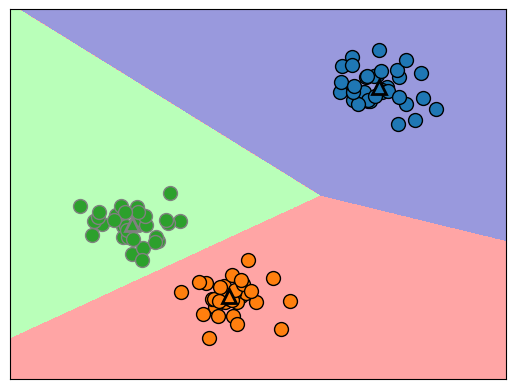

In [119]:
# 학습시킨 클러스터 중심의 경계
mglearn.plots.plot_kmeans_boundaries()

- scikit-learn에서 k-평균 알고리즘을 사용하는 것도 다른 알고리즘과 비슷
- 여기서는 앞에서 사용한 인위적 데이터셋에 적용
- KMeans의 객체를 생성하고 찾고자 하는 클러스터의 수를 지정하고, 다음 fit 메서드를 호출

In [120]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 인위적으로 2차원 데이터를 생성
X, y = make_blobs(random_state=1)

# 군집 모델을 만듦
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [121]:
# 알고리즘을 적용하면 X에 담긴 각 훈련 데이터 포인트에 클러스터 레이블이 할당
# kmeans.labels_ 속성에서 이 레이블을 확인할 수 있음
print("클러스터 레이블:\n{}".format(kmeans.labels_))

클러스터 레이블:
[0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]


In [122]:
print(kmeans.predict(X))

[0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]


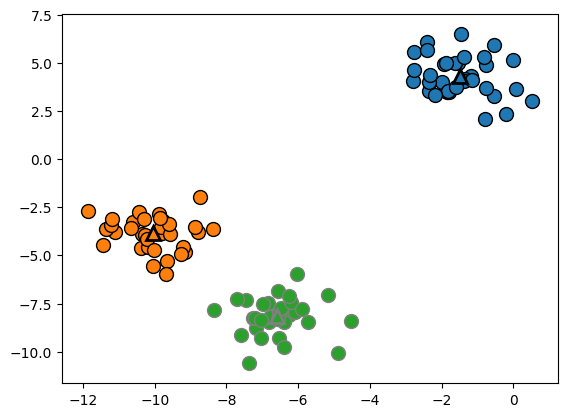

In [123]:
# cluster_centers_ 속성에 저장된 클러스터 중심을 삼각형으로 표시
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2], markers='^', markeredgewidth=2);

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


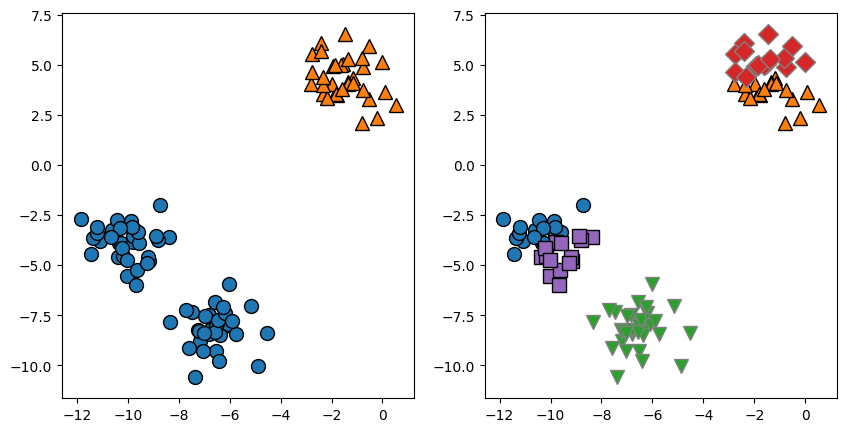

In [124]:
# k-평균 알고리즘으로 클러스터를 두 개 사용했을 때(왼쪽)와 다섯 개 사용했을 때(오른쪽)의 클러스터 할당
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 두 개의 클러스터 중심을 사용
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

# 다섯 개의 클러스터 중심을 사용
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1]);

### k-평균 알고리즘이 실패하는 경우
- 데이터셋의 클러스터 갯수를 정확하게 알고 있더라도 k-평균 알고리즘이 항상 이를 구분해낼 수 있는 것은 아님
- 각 클러스터를 정의하는 것이 중심 하나뿐이므로 클러스터는 둥근 형태로 나타남
- 이런 이유로 k-평균 알고리즘은 비교적 간단한 형태를 구분할 수 있음
- 또한 k-평균은 모든 클러스터의 반경이 똑같다고 가정
- 그래서 클러스터 중심 사이의 정확히 중간에 경계를 그림
- 이는 가끔 예상치 않은 결과를 만듦

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


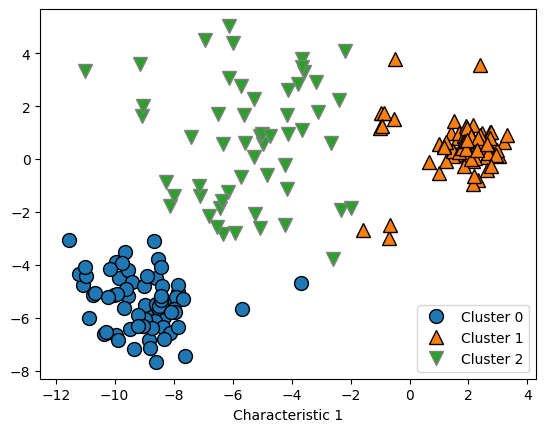

In [125]:
# 클러스터의 밀도가 다를 때 k-평균으로 찾은 클러스터 할당

X_varied, y_varied = make_blobs(n_samples=200, cluster_std=[1.0, 2.5, 0.5], random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)
mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Characteristic 0")
plt.xlabel("Characteristic 1");

- 왼쪽 아래에 모여 있는 영역을 첫 번째 클러스터 (클러스터 1), 오른쪽 위의 밀집된 영역을 두 번째 클러스터 (클러스터 0), 가운데 비교적 엉성한 영역을 세 번째 클러스터 (클러스터 2)라고 생각할 수 있음
- 그런데 클러스터 0과 클러스터 1은 클러스터 중심에서 멀리 떨어진 포인트들도 포함하고 있음
- k-평균은 또 클러스터에서 모든 방향이 똑같이 중요하다고 가정

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


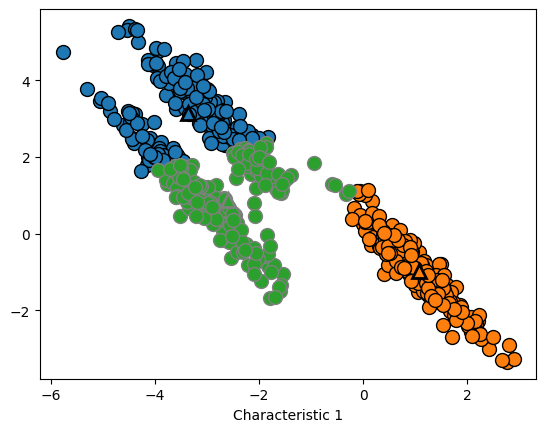

In [126]:
# 원형이 아닌 클러스터를 구분하지 못하는 k-평균 알고리즘
# 세 그룹으로 나뉜 2차원 데이터셋. 그러나 이 그룹들이 대각선으로 늘어서 있음
# k-평균은 가장 가까운 클러스터 중심까지의 거리만 고려하기 때문에 이런 데이터를 잘 처리하지 못함

# 무작위로 클러스터 데이터를 생성
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)
# 데이터가 길게 늘어지도록 변경
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# 세 개의 클러스터로 데이터에 KMeans 알고리즘을 적용
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스터 중심을 나타냄
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers="o")
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2], markers="^", markeredgewidth=2)
plt.xlabel("Characteristic 0")
plt.xlabel("Characteristic 1");

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ErYK\AppData\Local\Temp\ipykernel_10772\2259226596.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], cmap=mglearn.cm2, s=60, edgecolors="k")


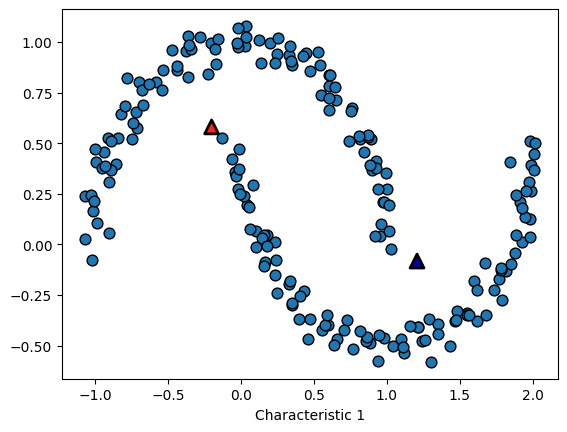

In [127]:
# 클러스터가 two_moons 데이터처럼 더 복잡한 형태라면 k-평균의 성능이 더 나빠짐. 복잡한 모양의 클러스터를 구분하지 못하는 k-평균 알고리즘
# two_moons 데이터를 생성 (이번에는 노이즈를 조금만 넣음)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 두 개의 클러스터로 데이터에 KMeans 알고리즘을 적용
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스터 중심을 표시
plt.scatter(X[:, 0], X[:, 1], cmap=mglearn.cm2, s=60, edgecolors="k")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="^", c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidths=2, edgecolors="k")
plt.xlabel("Characteristic 0")
plt.xlabel("Characteristic 1");

# 군집 알고리즘이 두 개의 반달 모양을 구분하면 좋겠지만 k-평균 알고리즘을 사용해서는 어려움

### 벡터 양지화 또는 분해 메서드로서의 k-평균
- k-평균이 군집 알고리즘이지만, k-평균과 PCA나 NMF 같은 분해 알고리즘 사이에는 유사점이 있음
- PCA는 데이터에서 분산이 가장 큰 방향을 찾으려 하고, NMF는 데이터의 극단 또는 일부분에 상응되는 중첩할 수 있는 성분을 찾는다고 배움
- 두 방법 모두 데이터 포인트를 어떤 성분의 합으로 표현
- 반면 k-평균은 클러스터 중심으로 각 데이터 포인트를 표현
- 이를 각 데이터 포인트가 클러스터 중심, 즉 하나의 성분으로 표현된다고 볼 수 있음
- k-평균을 이렇게 각 포인트가 하나의 성분으로 분해되는 관점으로 보는 것을 벡터 양자화 (Vector Quantization)라고 함

In [128]:
# PCA, NMF, k-평균에서 추출한 성분과 100개의 성분으로 테스트 세트의 얼굴을 재구성 한 것을 비교
# k-평균의 경우 재구성은 훈련 세트에서 찾은 가장 가까운 클러스터의 중심
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)

mask = np.zeros(people.target.shape, dtype=bool)
for target in np.unique(people.target):
  mask[np.where(people.target == target)[0][:50]] = 1

  X_people = people.data[mask]
  y_people = people.target[mask]

  # 0~255 사이의 흑백 이미지의 픽셀 값을 0~1 스케일로 조정
  # MinMaxScaler를 적용하는 것과 매우 유사
  X_peple = X_people / 255.

image_shape = people.images[0].shape

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=42)
nmf = NMF(n_components=100, init="nndsvd", random_state=0, max_iter=1000, tol=1e-2)
nmf.fit(X_train)
pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

X_reconstured_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstured_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstured_nmf = np.dot(nmf.transform(X_test), nmf.components_)

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


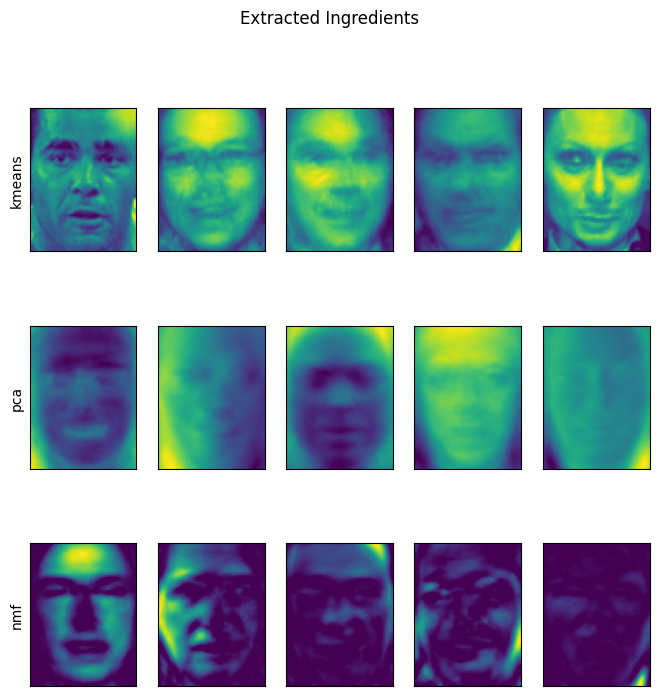

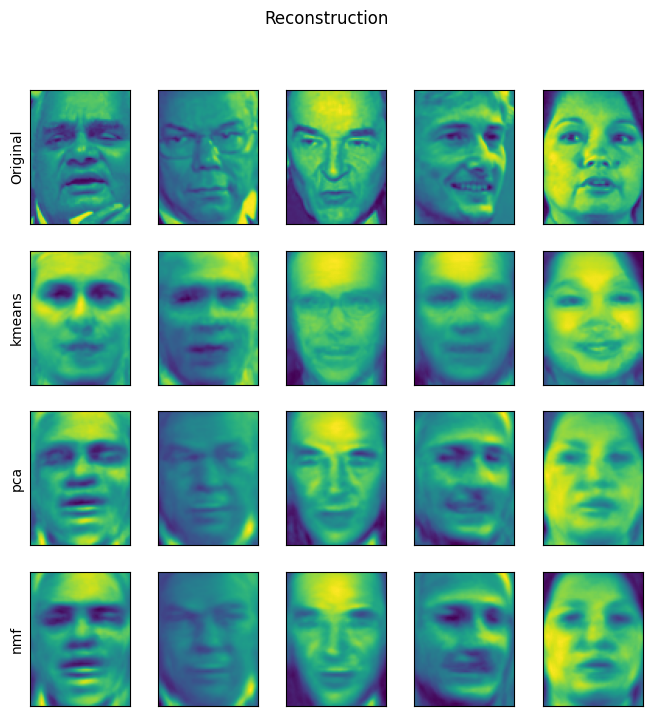

In [129]:
fig, axes = plt.subplots(3, 5, figsize=(8, 8), subplot_kw={"xticks": (), "yticks": ()})
fig.suptitle("Extracted Ingredients")

for ax, comp_kmeans, comp_pca, comp_nmf in zip(axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
  ax[0].imshow(comp_kmeans.reshape(image_shape))
  ax[1].imshow(comp_pca.reshape(image_shape))
  ax[2].imshow(comp_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")

fig, axes = plt.subplots(4, 5, figsize=(8, 8), subplot_kw={"xticks": (), "yticks": ()})
fig.suptitle("Reconstruction")

for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(axes.T, X_test, X_reconstured_kmeans, X_reconstured_pca, X_reconstured_nmf):
  ax[0].imshow(orig.reshape(image_shape))
  ax[1].imshow(rec_kmeans.reshape(image_shape))
  ax[2].imshow(rec_pca.reshape(image_shape))
  ax[3].imshow(rec_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("Original")
axes[1, 0].set_ylabel("kmeans")
axes[2, 0].set_ylabel("pca")
axes[3, 0].set_ylabel("nmf");

- k-평균을 사용한 벡터 양자화의 흥미로운 면은 입력 데이터의 차원보다 더 많은 클러스터를 사용해 데이터를 인코딩할 수 있다는 점
- two_moons 데이터를 다시 사용. 이 데이터가 2차원이므로 PCA와 NMF로는 할 수 있는 것이 많지 않음
- PCA나 NMF를 사용해 1차원으로 축소하면 이 데이터 구조가 완전히 파괴됨
- 하지만 많은 클러스터 중심을 사용한 k-평균은 데이터를 더 잘 표현할 수 있음

Cluster Label:
 [0 9 4 1 9 5 0 2 0 2 3 6 9 2 8 0 7 6 7 8 5 2 7 2 3 4 9 5 4 7 0 3 2 4 0 5 6
 0 8 4 6 3 7 4 9 3 0 8 4 2 8 6 5 1 2 0 7 2 7 3 6 1 9 0 2 1 3 9 3 1 6 1 6 4
 2 1 4 0 7 6 5 3 6 5 4 3 0 3 6 5 7 0 5 8 5 9 9 6 1 4 2 5 3 0 1 4 1 3 9 7 8
 3 3 1 0 9 7 5 6 0 0 8 4 3 4 8 0 4 2 5 0 8 1 6 2 9 2 1 5 0 4 4 7 3 3 0 4 2
 7 4 6 9 0 7 6 3 2 6 7 7 4 2 7 9 6 9 7 6 9 2 7 1 1 8 4 2 5 8 8 7 9 1 5 9 5
 7 3 2 1 8 1 7 0 0 4 8 5 4 3 9]


c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


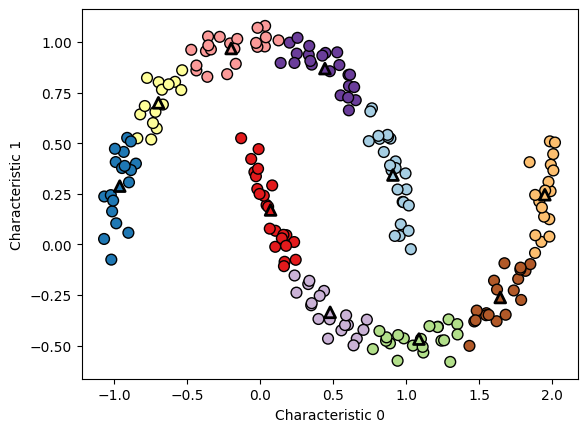

In [130]:
# 복잡한 형태의 데이터셋을 다루기 위해 많은 클러스터를 사용한 k-평균
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap="Paired", edgecolors="black")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60, marker="^", c=range(kmeans.n_clusters), linewidths=2, cmap="Paired", edgecolors="black")
plt.xlabel("Characteristic 0")
plt.ylabel("Characteristic 1")
print("Cluster Label:\n", y_pred);

- 10개의 클러스터를 사용했기 때문에 각 데이터 포인트는 0에서 9 사이의 숫자가 할당되어 있음
- 이는 데이터를 10개의 성분 (즉 10개의 특성)으로 표현한 것으로 볼 수 있으며, 포인트가 속한 클러스터에 해당하는 특성을 제외한 다른 특성은 모두 0이라고 생각할 수 있음
- 원래 특성 2개만으로는 불가능했지만, 이 10차원 형태를 이용하면 선형 모델을 사용해 두 개의 반달 모양을 구분할 수 있을 것 같음
- 또한 클러스터 중심까지의 거리를 특성으로 사용하면 데이터를 더욱 잘 나타낼 수 있음
- 이 데이터는 kmeans 모델의 transform 메서드를 사용하여 구할 수 있음

In [131]:
distance_features = kmeans.transform(X)
print("클러스터 거리 데이터의 형태:", distance_features.shape)
print("클러스터 거리:\n", distance_features)

클러스터 거리 데이터의 형태: (200, 10)
클러스터 거리:
 [[0.20114577 1.79608327 1.02576102 ... 0.51057099 1.52608012 1.13956805]
 [1.0130603  2.66745979 0.53925926 ... 1.71532972 2.55646013 0.1199124 ]
 [0.9321221  0.94281523 1.3332387  ... 0.75390788 0.80023234 1.74914157]
 ...
 [0.81176801 1.17728183 1.02075656 ... 0.91527635 1.12442758 1.48991975]
 [1.0283524  1.30493732 1.76193744 ... 0.34709785 0.87902968 1.98056306]
 [0.91038932 2.63552295 0.58824958 ... 1.60715445 2.4971347  0.04506731]]


- k-평균은 비교적 이해하기 쉽고 구현도 쉬울 뿐만 아니라 비교적 빠르기 때문에 가장 인기 있는 군집 알고리즘
- k-평균은 대용량 데이터셋에도 잘 작동하지만 scikit-learn은 아주 큰 대규모 데이터셋을 처리할 수 있는 MiniBatchKMeans도 제공
- k-평균의 단점 하나는 무작위 초기화를 사용하여 알고리즘의 출력이 난수 초깃값에 따라 달라진다는 점
- 기본적으로 scikit-learn은 서로 다른 난수 초깃값으로 10번 반복하여 최선의 결과를 만듦
- k-평균의 더 큰 단점은 클러스터의 모양을 가정하고 있어서 활용 범위가 비교적 제한적이며, 또 찾으려 하는 클러스터의 갯수를 지정해야만 한다는 것 (실제 애플리케이션에서는 알 수 없을 것)

- k-평균 알고리즘에서 클러스터 갯수를 선택하는 좋은 방법은 엘보우 방법(Elbow Method)
- 엘보우 방법은 클러스터 갯수를 늘려가면서 k-평균의 이너셔(Inertia) 감소가 완만해지는 지점을 찾음
- 이너셔는 클러스터 중심에서 클러스터에 속한 각 샘플간의 제곱 거리의 합
- scikit-learn의 KMeans 클래스는 inertia_ 속성에 이너셔 값을 제공
- 다음 코드는 two_moons 데이터에서 클러스터 1개에서 10개까지 KMeans 모델을 훈련하여 클러스터 개수에 대한 이너셔 그래프를 그림

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  s

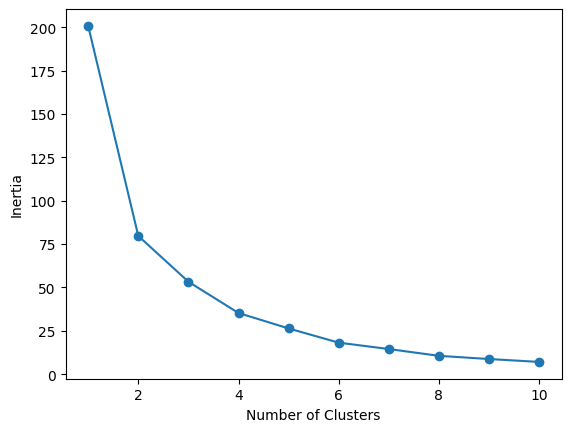

In [132]:
inertia = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(X)
  inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show();

- 그래프를 보면 클러스터 갯수 2~4에서 이너셔 값이 크게 꺾이는 것을 볼 수 있음
- 따라서 two_moons 데이터의 적절한 클러스터 갯수는 2~4 사이라고 생각할 수 있음

## 5-2. 병합 군집 (Agglomerative Clustering)
- 병합 군집은 다음과 같은 원리로 만들어진 군집 알고리즘의 모음을 말함
- 병합 군집 알고리즘은 시작할 때 각 포인트를 하나의 클러스터로 지정하고, 그다음 어떤 종료 조건을 만족할 때가지 가장 비슷한 두 클러스터를 합쳐나감
- scikit-learn에서 사용하는 종료 조건은 클러스터 갯수로, 지정된 갯수의 클러스터가 남을 때까지 비슷한 클러스터를 합침
- linkage 옵션에서 가장 비슷한 클러스터를 측정하는 방법을 지정
- 이 측정은 항상 두 클러스터 사이에서 이뤄짐

<scikit-learn에 구현된 옵션>
- ward : 기본값인 ward 연결(linkage)은 모든 클러스터 내의 분산을 가장 적게 증가시키는 두 클러스터를 합침. 그래서 크기가 비교적 클러스터가 만들어짐
- average : average 연결은 클러스터 포인트 사이의 평균 거리가 가장 짧은 두 클러스터를 합침
- complete : complete 연결(최대 연결이라고도 함)은 클러스터 포인트 사이의 최대 거리가 가장 짧은 두 클러스터를 합침

- ward가 대부분의 데이터셋에 알맞기 때문에 예제에서 이 옵션을 사용
- 클러스터에 속한 포인트 수가 많이 다를 땐 (예를 들면 한 클러스터가 다른 것보다 매우 클 때) average나 complete가 더 나을 수 있음

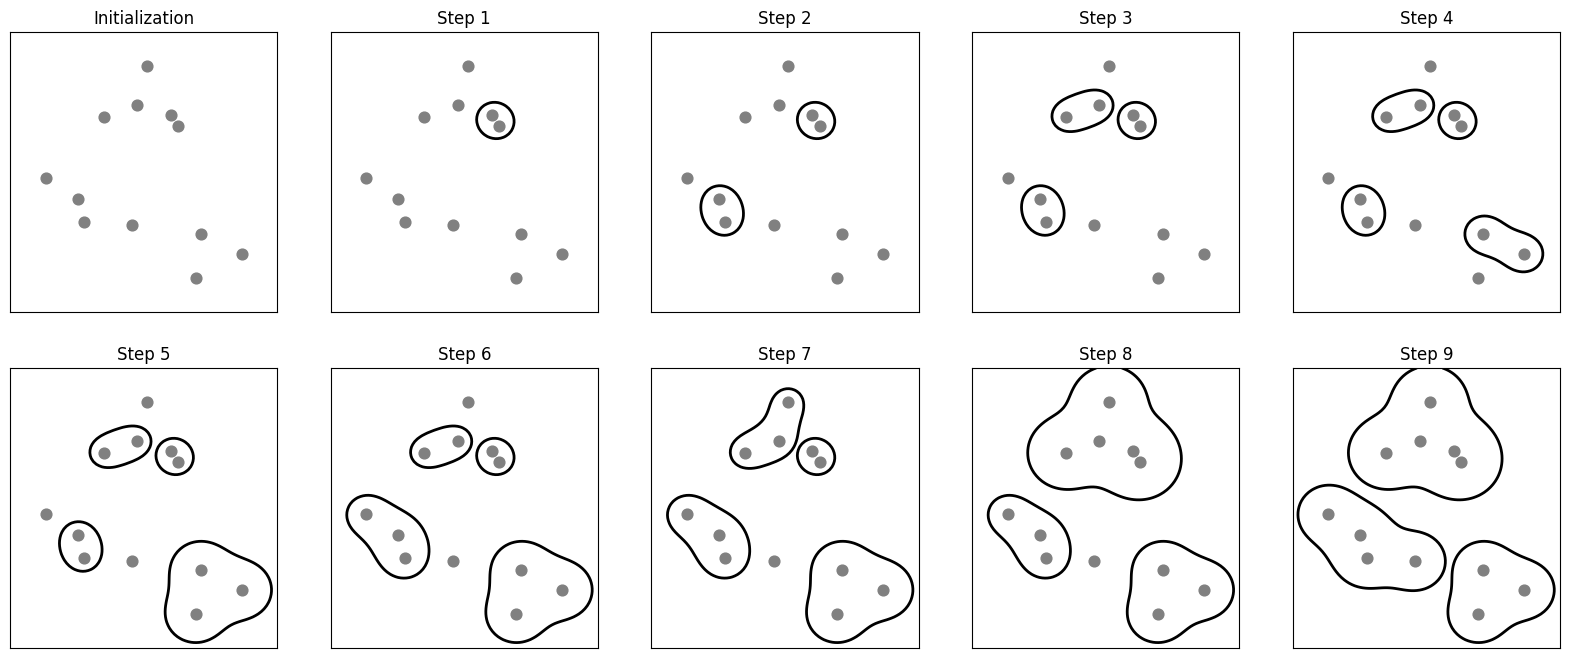

In [133]:
# 2차원 데이터셋에서 세 개의 클러스터를 찾기 위한 병합 군집의 과정
# 두 인접 클러스터를 반복적으로 합쳐나가는 병합 군집
mglearn.plots.plot_agglomerative_algorithm()

- 초기에 각 포인트가 하나의 클러스터임
- 그 다음 각 단계에서 가장 가까운 두 클러스터가 합쳐짐
- 네 번째 단계까지는 포인트가 하나뿐인 클러스터 두 개가 선택되어 합쳐져서 두 개의 포인트를 가진 클러스터가 되었음
- 단계 5에서 두 개의 포인트를 가진 클러스터 중 하나가 세 개의 포인트로 확장됨
- 이런 식으로 단계 9에 이르면 클러스터가 세 개만 남게됨
- 세 개의 클러스터를 찾는다고 지정했다면 알고리즘은 여기서 멈춤
- 앞에서 사용한 세 개의 클러스터가 있는 간단한 데이터로 병합 군집이 어떻게 작동하는지 알아봄
- 알고리즘의 작동 특성상 병합 군집은 새로운 데이터 포인트에 대해서는 예측할 수 없음
- 그러므로 병합 군집은 predict 메서드가 없음
- 대신 훈련 세트로 모델을 만들고 클러스터 소속 정보를 얻기 위해서 fit_predict 메서드를 사용

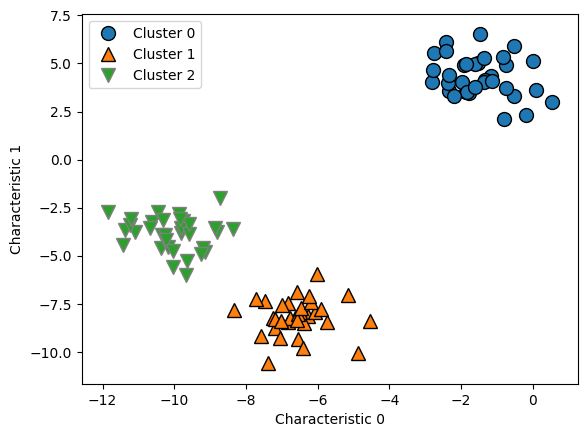

In [134]:
# 병합 군집을 사용한 세 개의 클러스터 할당
from sklearn.cluster import AgglomerativeClustering

X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Characteristic 0")
plt.ylabel("Characteristic 1");

- 예상대로 알고리즘은 클러스터를 완벽하게 찾았음
- scikit-learn의 병합 군집 모델을 사용하려면 찾을 클러스터의 개수를 지정해야 하지만, 병합 군집이 적절한 갯수를 선택하는 데 도움을 주기도 함

### 계층적 군집(Hierarchical Clustering) 과 덴드로그램
- 병합 군집은 계층적 군집을 만듦
- 군집이 반복하여 진행되면 모든 포인트는 하나의 포인트를 가진 클러스터에서 시작하여 마지막 클러스터까지 이동하게 됨
- 각 중단 단계는 데이터에 대한 (각기 다른 갯수의) 클러스터를 생성
- 이는 가능한 모든 클러스터를 연결해보는 데 도움이 됨

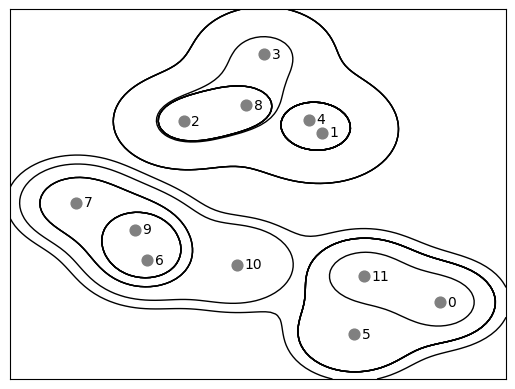

In [135]:
# 병합 군집으로 생성한 계층적 군집
mglearn.plots.plot_agglomerative()

- 이 그래프는 계층 군집의 모습을 자세히 나타내지만, 2차원 데이터일 때뿐이며 특성이 셋 이상인 데이터셋에는 사용할 수 없음
- 하지만 계층 군집을 식가화하는 또 다른 도구인 덴드로그램 (Dendrogram)은 다차원 데이터셋을 처리할 수 있음
- 아쉽게도 scikit-learn은 아직까지 덴드로그램을 그리는 기능을 제공하지 않음
- 그러나 SciPy를 사용해 손쉽게 만들 수 있음
- SciPy 군집 알고리즘은 scikit-learn의 군집 알고리즘과는 인터페이스가 조금 다름
- SciPy는 데이터 배열 X를 받아 계층 군집의 유사도가 들어있는 연결 배열(Linkage Array)을 반환하는 함수를 제공
- 이 연결 배열을 SciPy의 dendrogram 함수에 넣어 덴드로그램 그래프를 그릴 수 있음

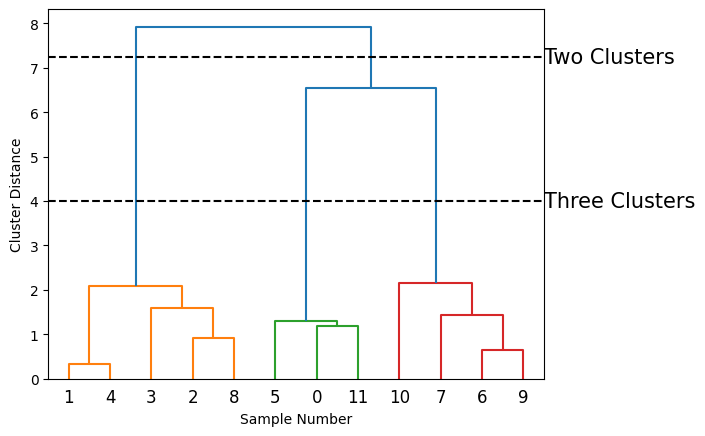

In [136]:
# SciPy에서 ward 군집 함수와 덴드로그램 함수를 임포트
from scipy.cluster.hierarchy import dendrogram, ward
X, y = make_blobs(random_state=0, n_samples=12)
# 데이터 배열 X에 ward 함수를 적용
# SciPy의 ward 함수는 병합 군집을 수행할 때 생성된
# 거리 정보가 담긴 배열을 반환
linkage_array = ward(X)
# 클러스터 간의 거리 정보가 담긴 linkage_array를 사용해 덴드로그램을 그림
dendrogram(linkage_array)

# 두 개와 세 개의 클러스터를 구분하는 커트라인을 표시
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], "--", c="k")
ax.plot(bounds, [4, 4], "--", c="k")

ax.text(bounds[1], 7.25, "Two Clusters", va="center", fontdict={"size": 15})
ax.text(bounds[1], 4, "Three Clusters", va="center", fontdict={"size": 15})
plt.xlabel("Sample Number")
plt.ylabel("Cluster Distance");

- 덴드로그램에서 데이터 포인트(숫자 0에서 11까지)는 맨 아래 나타남
- (각각이 하나의 클러스터인) 이 포인트들을 잎(leaf)으로 하는 트리가 만들어지면 새로운 부모 노드는 두 클러스터가 합쳐질 때 추가됨
- 만들어진 순서대로(아래에서 위로) 보면 데이터 포인트 1과 4가 먼저 합쳐졌음
- 다음으로 포인트 6과 0가 클러스터로 합쳐지고, 이런 식으로 계속됨
- 맨 꼭대기에는 두 개의 가지(branch)가 있는데, 그 중 하나는 포인트 11, 0, 5, 10, 7, 6, 9로, 다른 하나는 포인트 1, 4, 3, 2, 8로 구성되어 있음
- 이 둘이 그래프에서 가장 큰 클러스터들 임
- 덴드로그램의 y축이 단순히 병합 알고리즘에서 두 클러스터가 합쳐질 때를 나타내는 것만은 아님
- 가지의 길이는 합쳐진 클러스터가 얼마나 멀리 떨어져 있는지를 보여줌
- 이 덴드로그램에서 가장 긴 가지는 "세 개 클러스터"로 표시한 점선이 가로지르는 세 개의 수직선 임
- 이 가지가 가장 길다는 것은 클러스터가 세 개에서 두 개로 될 때 꽤 먼 거리의 포인트를 모은다는 뜻
- 그래프의 맨 위를 다시 보면 마지막 두 클러스터를 하나로 합칠 때의 거리도 비교적 멀다 할 수 있음
- 그렇지만 병합 군집은 two_moons 데이터셋과 같은 복잡한 형상을 구분하지 못하지만, DBSCAN 알고리즘은 이런 문제가 없음

In [137]:
agg = AgglomerativeClustering(n_clusters=None, distance_threshold=0)
agg.fit(X)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [138]:
# agg 객체의 children_속성을 출력하고 포함된 값의 의미를 알아보겠음
print(agg.children_)

[[ 1  4]
 [ 6  9]
 [ 2  8]
 [ 0 11]
 [ 5 15]
 [ 7 13]
 [ 3 14]
 [12 18]
 [10 17]
 [16 20]
 [19 21]]


- children_ 속성은 마지막 리프 노드(leaf node)를 제외한 모든 노드의 자식 노드의 인덱스를 담고 있음
- 샘플 갯수가 총 12개 이므로 리프 노드를 제외하고 11개의 노드가 있음
- 노드의 순서는 자식 노드 사이의 거리가 작은 것부터 큰 순서대로 정렬되어 있음
- 샘플 갯수(12)보다 작은 인덱스는 샘플의 인덱스임
- 예를 들어 첫 번째 노드([1 4])는 샘플 인덱스 1과 4를 자식 노드로 가짐
- 샘플 갯수보다 큰 인덱스는 병합된 노드의 인덱스임
- 예를 들어 다섯 번째 노드([5 15])는 샘플 인덱스 4와 병합된 노드 인덱스 15 - 12(샘플 갯수) = 3을 자식 노드로 가짐
- 노드 인덱스 3은 [0 11]에 해당
- 덴드로그램 함수를 사용하려면 children_, distances_ 속성과 함께 각 노드의 하위에 있는 전체 샘플 갯수를 전달해야 함
- 이를 위해 for 루프 안에서 샘플 갯수를 카운트
- 그 다음 np.column_stack함수로 세 배열을 열 방향으로 나란히 연결하여 dendrogram 함수에 전달

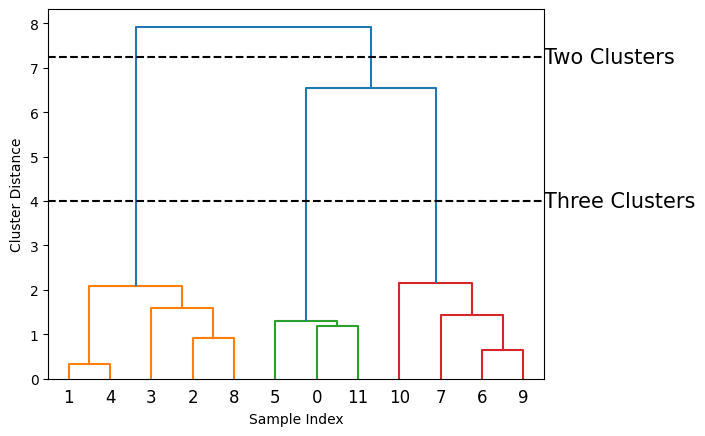

In [139]:
counts = np.zeros(agg.children_.shape[0])
n_samples = len(agg.labels_)
for i, merge in enumerate(agg.children_):
  current_count = 0
  for child_idx in merge:
    if child_idx < n_samples:
      current_count += 1  # 리프 노드
    else:
      current_count += counts[child_idx - n_samples]
  counts[i] = current_count

linkage_matrix = np.column_stack([agg.children_, agg.distances_, counts])
# 클러스터 간의 거리 정보가 담긴 linkage_matrix를 사용해 덴드로그램을 그림
dendrogram(linkage_matrix)

# 두 개와 세 개의 클러스터를 구분하는 커트라인을 표시
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], "--", c="k")
ax.plot(bounds, [4, 4], "--", c="k")

ax.text(bounds[1], 7.25, "Two Clusters", va="center", fontdict={"size": 15})
ax.text(bounds[1], 4, "Three Clusters", va="center", fontdict={"size": 15})
plt.xlabel("Sample Index")
plt.ylabel("Cluster Distance")
plt.show();

## 5-3. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
- DBSCAN은 아주 유용한 군집 알고리즘으로, 주요 장점은 클러스터의 갯수를 미리 지정할 필요가 없다는 점
- 이 알고리즘은 복잡한 형상도 찾을 수 있으며, 어떤 클래스에도 속하지 않는 포인트를 구분할 수 있음
- DBSCAN은 병합 군집이나 k-평균보다는 다소 느리지만 비교적 큰 데이터셋에도 적용할 수 있음
- DBSCAN은 특성 공간에서 가까이 있는 데이터가 많아 붐비는 지역의 포인트를 찾음
- 이런 지역을 특성 공간의 밀집 지역 (Dense Region)이라 함
- DBSCAN의 아이디어는 데이터의 밀집 지역이 한 클러스터를 구성하며 비교적 비어있는 지역을 경계로 다른 클러스터와 구분된다는 것
- 밀접 지역에 잇는 포인트를 핵심 샘플(또는 핵심 포인트)라고 하며 다음과 같이 정의함
- DBSCAN에는 두 개의 매개변수 min_samples와 eps가 있음
- 한 데이터 포인트에서 eps 거리 안에 데이터가 min_samples 갯수만큼 들어 있으면 이 데이터 포인트를 핵심 샘플로 분류
- eps보다 가까운 핵심 샘플은 DBSCAN에 의해 동일한 클러스터로 합쳐짐
- 이 알고리즘은 시각할 때 무작위로 포인트를 선택
- 그런 다음 그 포인트에서 eps 거리 안의 모든 포인트를 찾음
- 만약 eps 거리 안에 있는 포인트 수가 min_samples보다 적다면 그 포인트는 어떤 클래스에도 속하지 않는 잡음(noise)으로 레이블함
- eps 거리 안에 min_samples보다 많은 포인트가 있다면 그 포인트는 핵심 샘플로 레이블하고 새로운 클러스터 레이블을 할당
- 그런 다음 그 포인트의 (eps 거리 안의) 모든 이웃을 살핌
- 만약 어떤 클러스터에도 아직 할당되지 않았다면 바로 전에 만든 클러스터 레이블을 할당
- 만약 핵심 샘플이면 그 포인트의 이웃을 차례로 방문
- 이런 식으로 계속 진행하여 클러스터는 eps 거리 안에 더 이상 핵심 샘플이 없을 때까지 자라남
- 그런 다음 아직 방문하지 못한 포인트를 선택하여 같은 과정을 반복
- 결국 포인트의 종류는 세 가지
- 핵심 포인트, 경계 포인트(핵심 포인트에서 eps 거리 안에 있는 포인트), 그리고 잡음 포인트
- DBSCAN을 한 데이터셋에 여러 번 실행하면 핵심 포인트의 군집은 항상 같고 매번 같은 포인트를 잡음으로 레이블함
- 그러나 경계 포인트는 한 개 이상의 클러스터 핵심 샘플의 이웃일 수 있음
- 그렇기 때문에 경계 포인트가 어떤 클러스터에 속할지는 포인트를 방문하는 순서에 따라 달라짐
- 보통 경계 포인트는 많지 않으며 포인트 순서 때문에 받는 영향도 적어 중요한 이슈는 아님

In [140]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("클러스터 레이블:\n", clusters)

클러스터 레이블:
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


- 여기서는 모든 포인트에 잡음 포인트를 의미하는 -1 레이블이 할당되었음
- 이는 작은 샘플 데이터셋에 적합하지 않은 eps와 min_samples 기본값 때문
- 여러 가지 min_samples와 eps에 대한 클러스터 할당은 아래와 같음

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


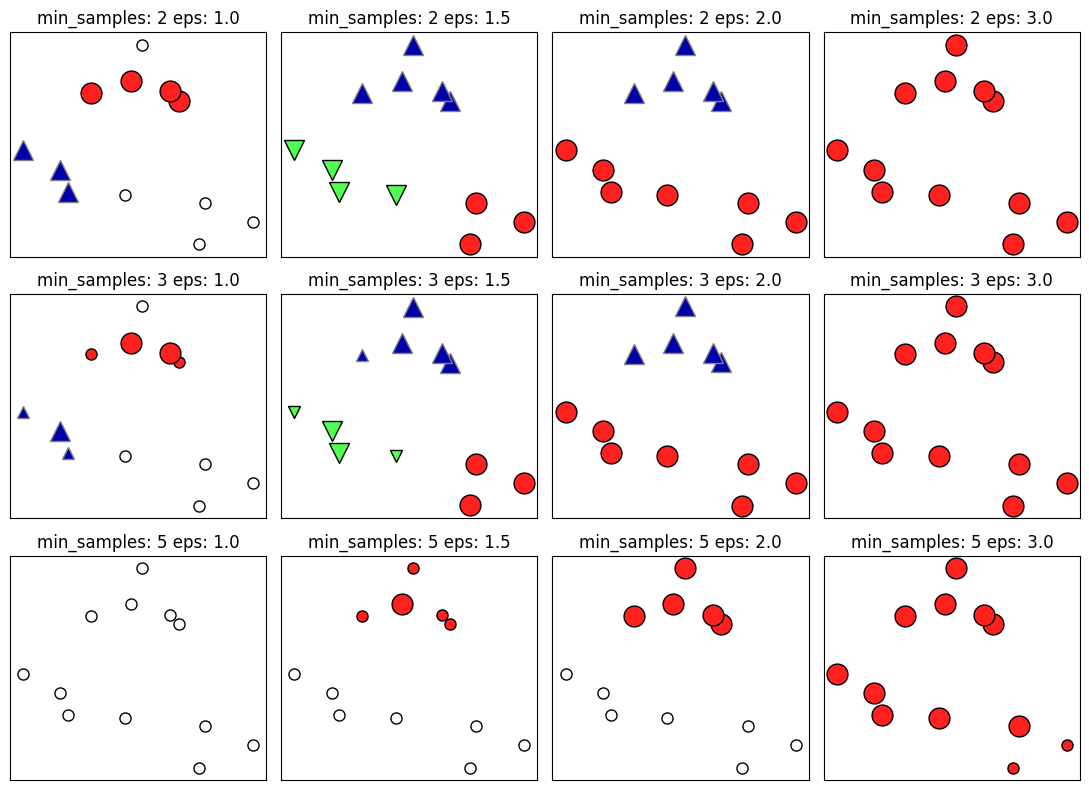

In [141]:
# min_samples와 eps 매개변수를 바꿔가며 DBSCAN으로 계산한 클러스터 할당
mglearn.plots.plot_dbscan()

- 이 그래프에서 클러스터에 속한 포인트는 색을 칠하고 잡음 포인트는 하얀색으로 남겨뒀음
- 핵심 샘플은 크게 표시하고 경계 포인트는 작게 나타냈음
- eps를 증가시키면 (왼쪽에서 오른쪽으로) 하나의 클러스터에 더 많은 포인트가 포함됨
- 이는 클러스터를 커지게 하지만 여러 클러스터를 하나로 합치게도 만듦
- min_samples를 키우면 (위에서 아래로) 핵심 포인트 수가 줄어들며 잡음 포인트가 늘어남
- eps 매개변수는 가까운 포인트의 범위를 결정하기 때문에 더 중요함
- eps를 매우 작게 하면 어떤 포인트도 핵심 포인트가 되지 못하고, 모든 포인트가 잡음 포인트가 될 수 있음
- eps를 매우 크게 하면 모든 포인트가 단 하나의 클러스터에 속하게 될 것
- min_samples 설정은 덜 조밀한 지역에 있는 포인트들이 잡음 포인트가 될 것인지, 아니면 하나의 클러스터가 될 것인지를 결정하는 데 중요한 역할을 함
- min_samples를 늘리면 min_samples의 수보다 작은 클러스터들은 잡음 포인트가 됨
- 그러므로 min_samples는 클러스터의 최소 크기를 결정
- eps=1.5일 때 min_samples=3과 min_samples=5의 그래프에서 이를 잘 확인할 수 있음
- min_samples=5일 때는 포인트가 각각 4, 5, 3개인 세 개의 클러스터가 있음
- min_samples=5일 때는 포인트가 4개와 3개인 작은 두 클러스터가 잡음 포인트로 바뀌었고 5개 샘플을 가진 클러스터만 남았음
- DBSCAN은 클러스터의 갯수를 지정할 필요가 없지만 eps의 값은 간접적으로 몇 개의 클러스터가 만들어질지 제어함
- 적절한 eps 값을 쉽게 찾으려면 StandardScaler나 MinMaxScaler로 모든 특성의 스케일을 비슷한 범위로 조정해주는 것이 좋음

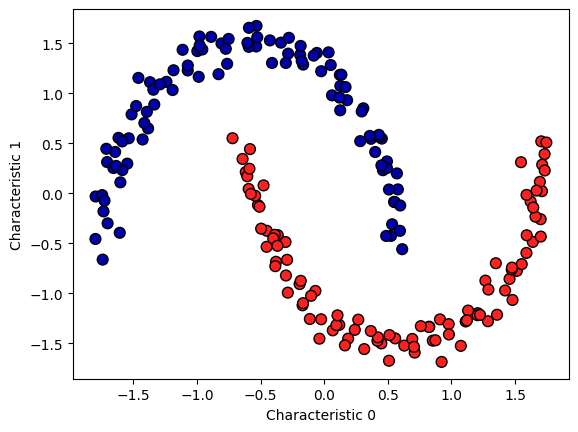

In [143]:
# two_moons 데이터셋에 DBSCAN을 적용한 결과
# 이 알고리즘은 기본 설정값으로 두 개의 반달 모양을 정확히 찾아 구분하였음
# 기본값 eps=0.5를 사용해 DBSCAN으로 찾은 클러스터 할당
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
# 클러스터 할당을 표시
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60, edgecolors="black")
plt.xlabel("Characteristic 0")
plt.ylabel("Characteristic 1");

- 이 알고리즘은 예상한 클러스터 갯수(2개)를 만들어내므로 매개변수 설정이 잘 맞는 것 같음
- eps를 (기본값인 0.5에서) 0.2로 내리면 너무 많은 8의 클러스터 레이블을 다른 배열의 인덱스로 사용할 경우 잡음 포인트를 의미하는 -1 값이 예상치 못한 결과를 만들 수 있기 때문

## 5-4. 군집 알고리즘의 비교와 평가
- 군집 알고리즘을 적용하는 데 어려운 점 하나는 알고리즘이 잘 작동하는지 평가하거나 여러 알고리즘의 출력을 비교하기가 매우 어려움
- 군집 알고리즘의 평가에 대해 이야기한 후 실제 데이터셋을 이용해 k-평균, 병합 군집, DBSCAN 알고리즘을 비교
### 타깃 값으로 군집 평가하기
- 